<a href="https://colab.research.google.com/github/dxqvertf98/2025AiBasic/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_%EB%AA%A8%EB%8D%B8_%EC%84%A4%EA%B3%84_%EC%97%B0%EC%8A%B5%EB%85%B8%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
iris1=files.upload()
iris2=files.upload()

Saving Iris1.csv to Iris1 (1).csv


Saving Iris2.csv to Iris2 (1).csv


In [6]:
import pandas as pd
df1=pd.read_csv('Iris1.csv')
df2=pd.read_csv('Iris2.csv') #df2.head(5) 상위 5개 데이터

In [7]:
#데이터 합치기
df=pd.concat([df1, df2]) #같은 배열에 넣음 -> 위아래 방향으로 합침

**데이터 전처리**

In [11]:
#결측치 확인하기
#df.isna -> 결측치o:T, 결측치x:F
df.isna().sum() #각 컬럼별 결측치 개수 확인

,0
일련번호,0
꽃받침 길이,3
꽃받침 너비,4
꽃잎 길이,2
꽃잎 너비,3
종류,0


In [13]:
#결측치 있는 행 제거
df3=df.dropna(axis=0, inplace=False)
#axis(축)=0 -> 행
#axis(축)=1 -> 열
#inplace=False -> 기존 데이터 프레임 df는 적용x, df3에만 결측치 제거값 적용
df3.isna().sum()

,0
일련번호,0
꽃받침 길이,0
꽃받침 너비,0
꽃잎 길이,0
꽃잎 너비,0
종류,0


In [18]:
#이상치(범위 벗어나는 값) 확인
df3.describe() #describe():기초통계량 확인
df3.groupby('종류')['꽃받침 길이'].describe()
#니맘대로 안에있는 값 바꾸면서 확인하셈, 평균값 확인하는 게 좋음

#버지니카-버시컬러-세토사 순으로 크다고 추측
#max에서 버시컬러-버지니카-세토사 순으로 순서 변경됨 -> 이상치 확인됨

,count,mean,std,min,25%,50%,75%,max
종류,,,,,,,,
버시컬러,59.0,6.105085,1.289670,4.9,5.6,5.9,6.35,15.0
버지니카,58.0,6.574138,0.657096,4.9,6.2,6.5,6.90,7.9
세토사,55.0,5.014545,0.368891,4.3,4.8,5.0,5.25,5.8


In [19]:
df3.groupby('종류')['꽃잎 길이'].describe()
#df3.groupby('종류')['꽃잎 너비'].describe()

,count,mean,std,min,25%,50%,75%,max
종류,,,,,,,,
버시컬러,59.0,4.261017,0.453727,3.0,4.0,4.40,4.600,5.1
버지니카,58.0,7.181034,8.760447,4.5,5.1,5.55,5.975,55.0
세토사,55.0,1.454545,0.173011,1.0,1.4,1.50,1.500,1.9


In [21]:
#히스토그램으로 이상치 확인
!pip install koreanize-matplotlib # 한글 폰트 설정 라이브러리 설치

In [22]:
import koreanize_matplotlib # 한글 출력 가능한 그래프 모듈
import matplotlib.pyplot as plt # 그래프 그리기에 필요한 모듈
import seaborn as sns # 시각화하기 위해 seaborn 모듈 불러오기

<Axes: xlabel='꽃받침 길이', ylabel='Count'>

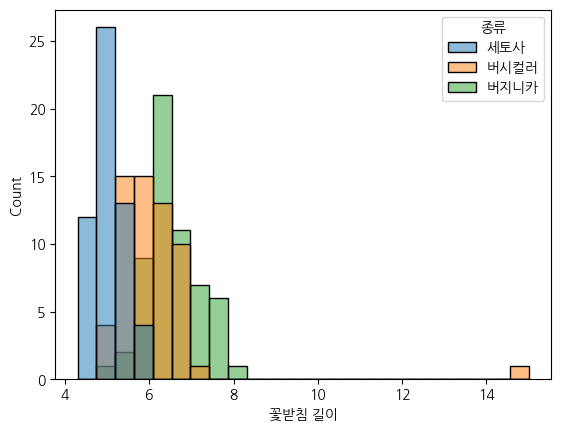

In [23]:
sns.histplot(data = df3, x = '꽃받침 길이', hue = '종류')

<Axes: xlabel='꽃받침 너비', ylabel='Count'>

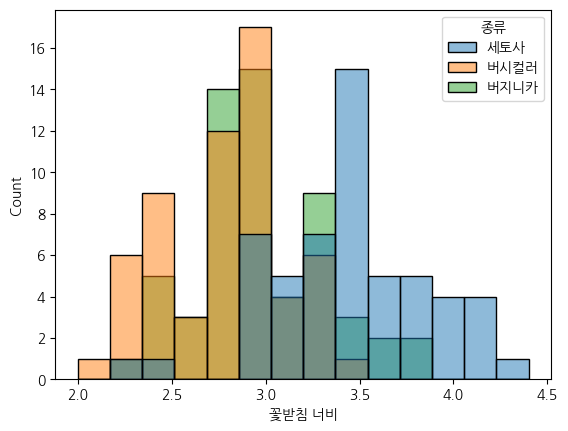

In [24]:
sns.histplot(data = df3, x = '꽃받침 너비', hue = '종류')

<Axes: xlabel='꽃잎 길이', ylabel='Count'>

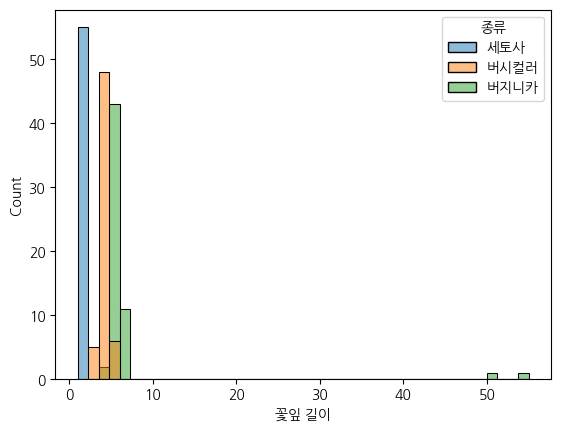

In [25]:
sns.histplot(data = df3, x = '꽃잎 길이', hue = '종류')

<Axes: xlabel='꽃잎 너비', ylabel='Count'>

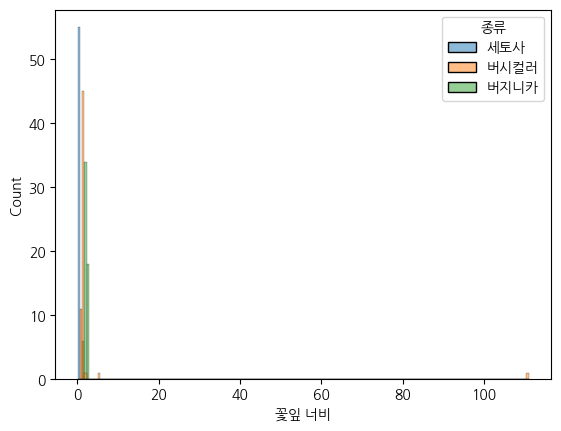

In [26]:
sns.histplot(data = df3, x = '꽃잎 너비', hue = '종류')

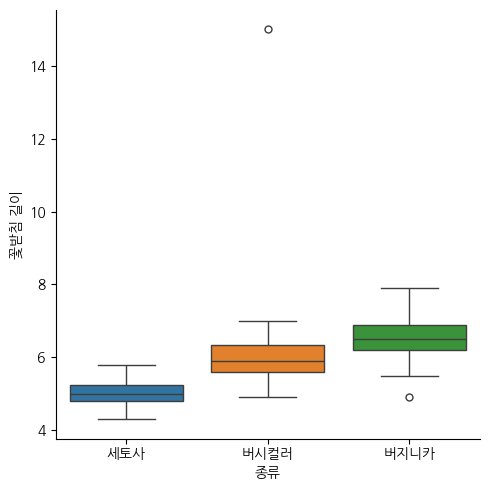

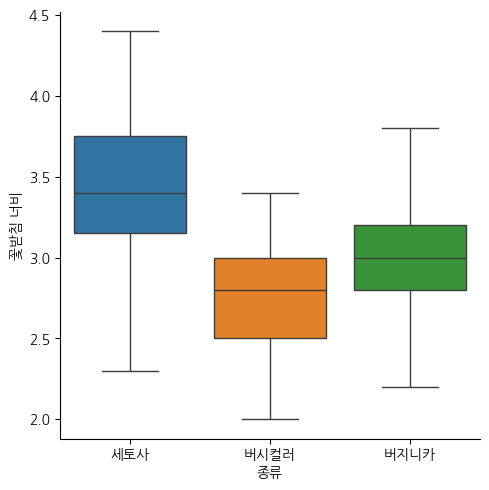

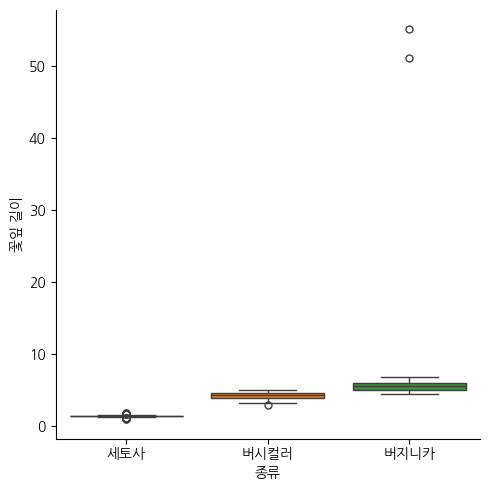

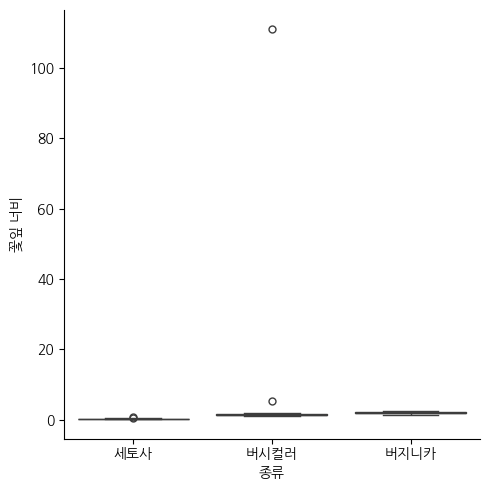

In [27]:
#박스플롯으로 이상치 확인
sns.catplot(y = '꽃받침 길이', x = '종류', kind = 'box', data = df3,hue='종류')
sns.catplot(y = '꽃받침 너비', x = '종류', kind = 'box', data = df3,hue='종류')
sns.catplot(y = '꽃잎 길이', x = '종류', kind = 'box', data = df3,hue='종류')
sns.catplot(y = '꽃잎 너비', x = '종류', kind = 'box', data = df3,hue='종류')